In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
target_fs = pd.read_csv('target_fs.csv')

In [3]:
target_fs

,index,per1,per2,per3,per4,per5,per6,roe1,roe2,roe3,...,opm3,opm4,opm5,opm6,eps1,eps2,eps3,eps4,eps5,eps6
0,삼성전자,9.66,13.78,14.54,36.84,28.42,76.19,13.71,10.66,9.27,...,3.61,4.17,9.19,11.14,206.0,228.0,810.0,887.0,975.0,1071.0
1,SK하이닉스,-27.69,-10.24,-7.27,-11.30,-28.88,52.20,-3.75,-13.20,-18.54,...,-19.77,3.06,23.22,30.93,-3545.0,-4109.0,-3000.0,-1864.0,2636.0,4531.0
2,LG에너지솔루션,131.25,93.80,73.28,80.86,125.56,1920.93,5.47,7.15,7.64,...,8.89,4.23,2.57,4.10,2139.0,1848.0,1401.0,-101.0,-2.0,171.0
3,현대차,5.61,5.98,4.60,4.67,5.38,24.15,11.30,11.26,12.99,...,9.32,8.35,8.75,9.28,12034.0,11799.0,11634.0,8117.0,11791.0,12342.0
4,삼성바이오로직스,70.53,64.13,51.73,63.07,66.06,221.82,11.79,9.28,10.32,...,30.81,32.60,23.37,29.70,1992.0,2598.0,3377.0,4084.0,2520.0,3300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,롯데관광개발,-3.70,-2.93,-4.61,-3.45,-4.99,-46.29,-268.41,-116.63,-117.67,...,0.35,-10.02,8.28,9.77,-1277.0,-648.0,-396.0,-413.0,-506.0,-207.0
195,PI첨단소재,42.77,73.11,135.80,-498.79,83.10,60.60,8.38,4.83,1.81,...,6.91,2.05,4.77,19.27,-273.0,74.0,143.0,-5.0,51.0,408.0
196,녹십자홀딩스,83.69,144.06,-122.86,-14.96,-12.30,NaN,0.91,0.49,-0.56,...,3.83,-3.22,-6.62,NaN,-518.0,-213.0,-170.0,-192.0,-823.0,NaN
197,KG스틸,1.94,1.78,1.51,3.80,3.80,10.74,35.52,33.27,33.16,...,9.06,4.04,6.37,9.18,539.0,566.0,575.0,662.0,40.0,586.0


In [4]:
price = pd.read_csv('/Users/raphaelseo/Documents/projects/quantas/price_df.csv')

In [5]:
price = price[['corp_name', '날짜', '종가']]

In [6]:
price_dic = {}
for name in price['corp_name'].unique():
    price_dic[name] = list(price[price['corp_name']==name]['종가'])

In [7]:
def pad_list(lst, padding_value=None):
    return [padding_value] * (244 - len(lst)) + lst

for k in price_dic.keys():
    ls = price_dic[k]
    ls = pad_list(ls)
    price_dic[k] = ls


In [8]:
temp_df = pd.DataFrame(price_dic)

In [9]:
data = temp_df.values

In [10]:
price_df = pd.DataFrame(data=data, columns=price['corp_name'].unique(), index=pd.to_datetime(price['날짜'].unique()))

In [11]:
returns = price_df.pct_change()

In [62]:
def extract(indi , n, df):
    if indi == 'per':
        res = df[(df[f'per{n}'] < 7) & (df[f'per{n}'] > 4)][['index', f'per{n}']]
        result = res.sort_values(f'per{n}')[:5]['index'].values
    elif indi == 'roe':
        res = df[df[f'roe{n}'] >= 25][['index', f'roe{n}']]
        result = res.sort_values(f'roe{n}', ascending=False)[:5]['index'].values
    elif indi == 'dr':
        res = df[df[f'dr{n}'] <= 50][['index', f'dr{n}']]
        result = res.sort_values(f'dr{n}')[:3]['index'].values
    elif indi == 'opm':
        res = df[df[f'opm{n}'] >= 15][['index', f'opm{n}']]
        result = res.sort_values(f'opm{n}', ascending=False)[:3]['index'].values
    elif indi == 'eps':
        res = df[df[f'eps{n}'] >= 500][['index', f'eps{n}']]
        result = res.sort_values(f'eps{n}', ascending=False)[:5]['index'].values
    else:
        return print('그것은 적절한 지표가 아닙니다.')
    
    return result

In [63]:
def calc_ratio(stra, length):
    if stra == 'per':
        r = 50
    elif stra == 'roe':
        r = 25
    elif stra == 'dr' or stra == 'opm':
        r = 5
    elif stra == 'eps':
        r = 15
    return r / length / 100

In [64]:
def make_portfolio(n):
    strategy = ['per', 'roe', 'dr', 'opm', 'eps']
    corps = {}
    weight = {}
    for s in strategy:
        corps[s] = extract(s, n, target_fs)
    for k in corps.keys():
        ratio = calc_ratio(k, len(corps[k]))
        for c in corps[k]:
            weight[c] = ratio
    
    return weight

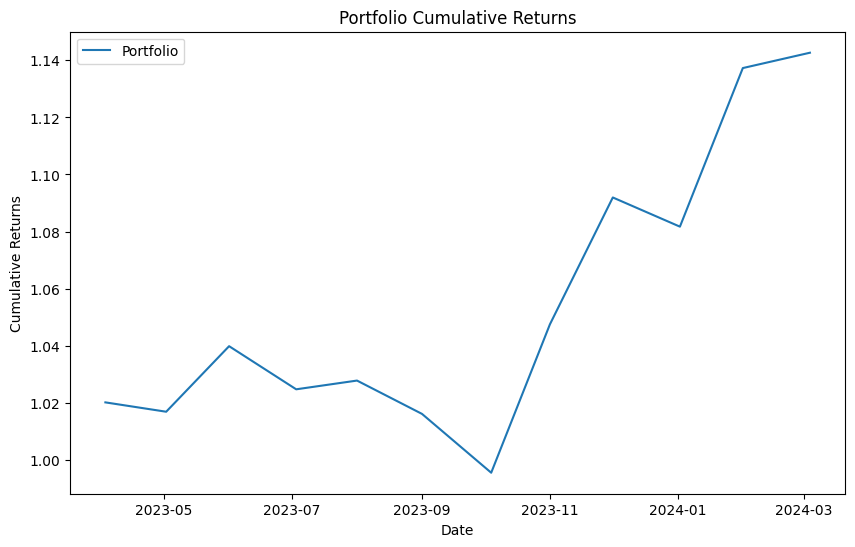

In [65]:
# 매월 첫 거래일과 마지막 거래일 식별
first_days = price_df.groupby(pd.Grouper(freq='M')).apply(lambda x: x.index[0])
last_days = price_df.groupby(pd.Grouper(freq='M')).apply(lambda x: x.index[-1])

# 포트폴리오의 월별 수익률 계산
portfolio_returns = []

for i, (start, end) in enumerate(zip(first_days, last_days)):
    # print(start, end)
    # 분기별로 포트폴리오 재구성
    if i % 3 == 0:
        weights = make_portfolio((i//3 + 1))
    # 매수 가격 (월 첫 거래일)
    buy_prices = price_df.loc[start, list(weights.keys())]
    
    # 매도 가격 (월 마지막 거래일)
    sell_prices = price_df.loc[end, list(weights.keys())]
    
    # 각 종목별 수익률 계산
    stock_returns = (sell_prices / buy_prices) - 1
    
    # 포트폴리오 수익률 계산
    weighted_return = sum(stock_returns * list(weights.values()))
    portfolio_returns.append(weighted_return)
# 포트폴리오의 월별 수익률을 데이터프레임으로 변환
portfolio_returns = pd.Series(portfolio_returns, index=first_days)

# 포트폴리오의 누적 수익률 계산
cumulative_returns = (1 + portfolio_returns).cumprod()

# 누적 수익률 시각화
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns, label='Portfolio')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

In [66]:
2746.63/2472.34 - 1

0.11094347864775878

In [67]:
cumulative_returns

2023-04-03    1.020152
2023-05-02    1.016875
2023-06-01    1.039841
2023-07-03    1.024731
2023-08-01    1.027795
2023-09-01    1.016114
2023-10-04    0.995504
2023-11-01    1.047497
2023-12-01    1.091948
2024-01-02    1.081721
2024-02-01    1.137289
2024-03-04    1.142666
dtype: float64